# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [2]:
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/'
target_files = ['orders.csv', 'order_status.csv', 'products.csv']

In [3]:
data_files = []
for path, dirs, files in os.walk(way):
    for file in files:
        if file in target_files:
            data_files.append(os.path.join(path, file))

In [4]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shared/homeworks/python_ds_miniprojects/final_project/data/products/Сабвуфер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-gilvanov/shar

In [5]:
orders_df_list = []
order_status_df_list = []
products_df_list = []

In [6]:
for file_path in data_files:
    if 'orders.csv' in file_path:
        orders_df = pd.read_csv(file_path)
        orders_df['manager'] = file_path.split('/')[-2]
        orders_df['date'] = file_path.split('/')[-3]
        orders_df_list.append(orders_df)
    elif 'products.csv' in file_path:
        products_df = pd.read_csv(file_path)
        products_df['category'] = file_path.split('/')[-2]
        products_df_list.append(products_df)
    else:
        order_status_df_list.append(pd.read_csv(file_path))

In [7]:
df_orders = pd.concat(orders_df_list, ignore_index=True)
df_order_status = pd.concat(order_status_df_list, ignore_index=True)
df_products = pd.concat(products_df_list, ignore_index=True)

In [8]:
df_orders.to_csv('df_orders.csv', index=False)
df_order_status.to_csv('df_order_status', index=False)
df_products.to_csv('df_products', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

In [9]:
#1) Переведем колонку date в тип datetime.
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [10]:
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [11]:
unique_orders_per_date = df_orders.groupby('date',as_index=False)['order_id'].nunique()
unique_orders_per_date = unique_orders_per_date.rename(columns={'order_id': 'orders'})

In [12]:
unique_orders_per_date.sort_values('orders', ascending=False)

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

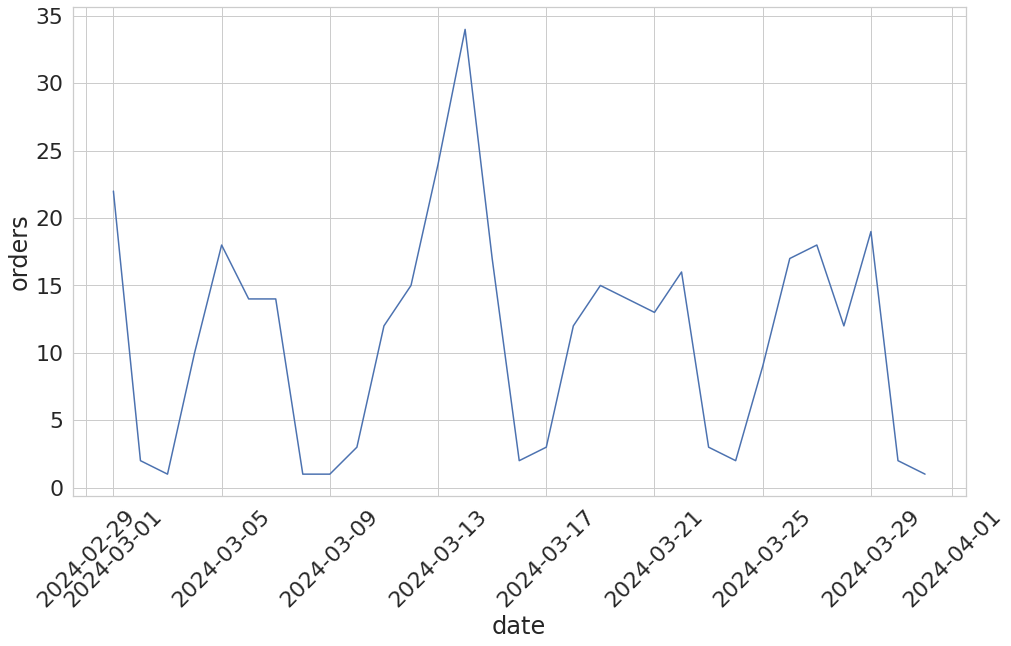

In [13]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(16, 9)}
        )

sns.lineplot(data = unique_orders_per_date, x='date', y='orders');
plt.xticks(rotation=45);

In [ ]:
# Ответ: Да, по выходным почти нет заказов

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

In [ ]:
# Ответ: 2024-03-08. Это праздничный день, в который было мало заказов

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

In [14]:
orders_status = df_orders.merge(df_order_status, on='order_id')
orders_status.to_csv('orders_status.csv', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [15]:
status_counts = orders_status[['order_id', 'status']].drop_duplicates()

In [16]:
status_counts['status'].value_counts(normalize=True).round(2)

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

In [ ]:
# Доля отмененных заказов составила 0.11

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [17]:
grouped_data = orders_status.groupby(['date', 'status'], as_index=False)\
                            ['order_id'].nunique()\
                            .rename(columns={'order_id': 'orders'})\
                            .pivot_table(index='date', columns='status', values='orders')\
                            .rename_axis(None, axis=1)\
                            .fillna(0)

In [18]:
grouped_data = grouped_data[['canceled', 'confirmed']].astype(int)

In [19]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2024-03-01 to 2024-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   canceled   31 non-null     int64
 1   confirmed  31 non-null     int64
dtypes: int64(2)
memory usage: 744.0 bytes


In [20]:
grouped_data.query('confirmed == 0')

,canceled,confirmed
date,,
2024-03-09,1,0


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

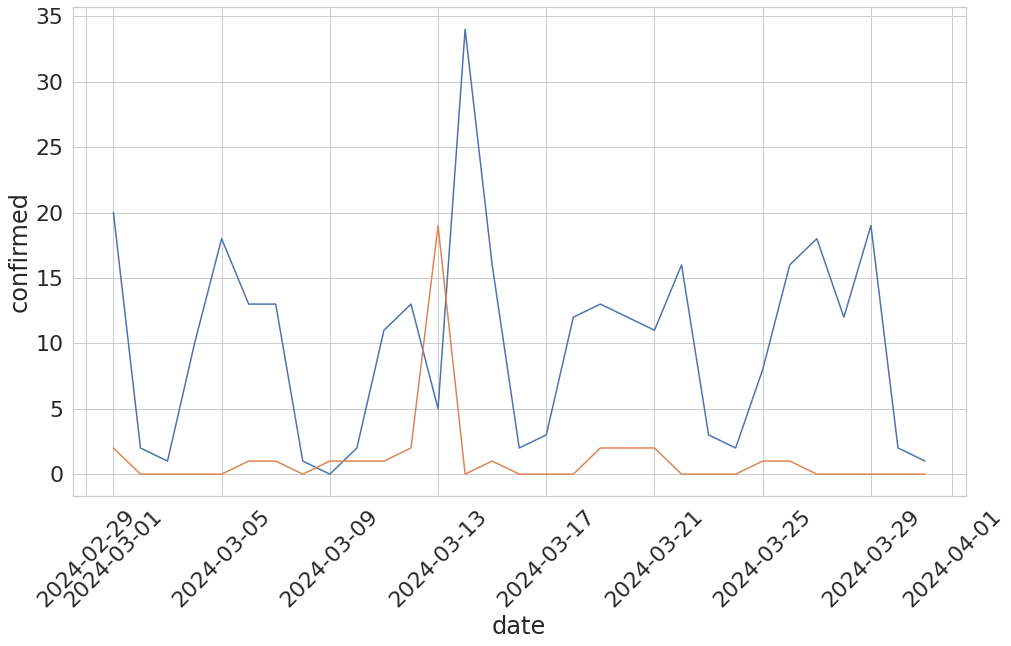

In [21]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(16, 9)}
        )

sns.lineplot(data = grouped_data, x='date', y='confirmed');
plt.xticks(rotation=45);

sns.lineplot(data = grouped_data, x='date', y='canceled');
plt.xticks(rotation=45);

In [ ]:
# В день с наибольшим числом заказов было много успешно оформленных заказов
# В день, предшествующий дню с наибольшим числом заказов, было много отмен

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

In [22]:
#1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: 
#посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента 
#(примените к соответствующим колонкам функции max).

canceled_orders_13_march = orders_status[orders_status['date'] == '2024-03-13'].query("status == 'canceled'")

In [23]:
aggregated_data_13_march = canceled_orders_13_march.groupby('order_id',as_index=False).agg({
    'product_id': 'nunique',  # количество уникальных товаров
    'quantity': 'sum',  # сумма единиц всех товаров
    'manager': 'max',  # менеджер
    'client_id': 'max'  # клиент
})

In [24]:
aggregated_data_13_march = aggregated_data_13_march.rename(columns={
    'product_id': 'unique_products_count',
    'quantity': 'total_quantity'
})

In [25]:
aggregated_data_13_march.head()

,order_id,unique_products_count,total_quantity,manager,client_id
0,AFIH-00611801,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,14,294,Ксения Балалайкина,73
2,CLBQ-63032648,13,205,Виктор Тромбонов,60
3,CYJY-07359557,13,316,Екатерина Тарелкина,56
4,GHGB-88045656,4,42,Ксения Балалайкина,7


In [26]:
#2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: 
#посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента 
#(примените к соответствующим колонкам функции max).

confirmed_orders_14_march = orders_status[orders_status['date'] == '2024-03-14'].query("status == 'confirmed'")

In [27]:
aggregated_data_14_march = confirmed_orders_14_march.groupby('order_id',as_index=False).agg({
    'product_id': 'nunique',  # количество уникальных товаров
    'quantity': 'sum',  # сумма единиц всех товаров
    'manager': 'max',  # менеджер
    'client_id': 'max'  # клиент
})

In [28]:
aggregated_data_14_march.head()

,order_id,product_id,quantity,manager,client_id
0,ACXS-56511429,8,177,Алексей Саксофонов,24
1,AUZX-12706022,19,369,Екатерина Тарелкина,83
2,BCMM-97072924,17,325,Алексей Саксофонов,51
3,BGHE-44722549,8,149,Виктор Тромбонов,95
4,DMEB-71700015,12,190,Сергей Контрабасов,93


In [29]:
#3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, 
#число уникальных товаров в заказе и общее число товаров в штуках. 
#Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.

In [30]:
aggregated_data = aggregated_data_13_march.merge(aggregated_data_14_march, on=['manager', 'client_id'])

In [31]:
aggregated_data.head()

,order_id_x,unique_products_count,total_quantity,manager,client_id,order_id_y,product_id,quantity
0,AFIH-00611801,11,192,Алексей Саксофонов,43,FDEB-71487438,11,192
1,BBFJ-27674101,14,294,Ксения Балалайкина,73,UETB-44283966,14,294
2,CLBQ-63032648,13,205,Виктор Тромбонов,60,IECD-18739530,13,205
3,CYJY-07359557,13,316,Екатерина Тарелкина,56,WNMY-98871151,13,316
4,GHGB-88045656,4,42,Ксения Балалайкина,7,JUGG-73806170,4,42


In [32]:
#4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. 
#Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. 
#Так вы узнаете долю заказов, которые повторяют вчерашние.

aggregated_data.shape[0] / aggregated_data_14_march.shape[0]

0.5

In [33]:
#Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. 
#В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их 
#повторно на следующий день. 
#Почти половина заказов повторяет вчерашние

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

In [34]:
# Открываем файл usd_rate.txt с помощью контекстного менеджера
with open('usd_rate.txt', 'r') as file:
    # Читаем строки из файла и сохраняем их в переменную currency
    currency = file.readlines()

In [35]:
df_currency = pd.DataFrame(currency, columns=['usd_rate'])

In [36]:
df_currency = df_currency['usd_rate'].str.split(',', expand=True)

In [37]:
df_currency = df_currency.rename(columns={
    0: 'date',
    1: 'currency_rate'
})

In [38]:
#С применением функций
#df_currency['date'] = df_currency['usd_rate'].apply(lambda x: x.split(',')[0])
#df_currency['currency_rate'] = df_currency['usd_rate'].apply(lambda x: float(x.split(',')[1]))

In [39]:
df_currency['date'] = pd.to_datetime(df_currency['date'])

In [40]:
df_currency = df_currency.drop(columns=2)

In [41]:
df_currency

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [42]:
df_currency['currency_rate'] = pd.to_numeric(df_currency['currency_rate'])

In [43]:
df_currency['currency_rate'].mean().round(2)

91.7

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

In [44]:
#1) Присоедините к датафрейму orders_status датафрейм df_products, указав, что ключом в левом датафрейме будет 
#   являться колонка product_id (параметр left_on), а в правом — колонка id (параметр right_on). 
#   Новый датафрейм сохраните в df_full.

df_full = pd.merge(orders_status, df_products, left_on='product_id', right_on='id', how='inner')

In [45]:
#2) К датафрейму df_full добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм df_currency 
#   по общей колонке с датой.

df_full = df_full.merge(df_currency, on='date')

In [46]:
#3) Создайте колонку price_rub с ценами в рублях. 
#   Для этого умножьте значения в колонке price с ценами на значения в колонке currency_rate с курсом валюты.

df_full['price_rub'] = df_full['price'] * df_full['currency_rate']

In [47]:
#4) Создайте колонку revenue с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку 
#   с количеством товара.

df_full['revenue'] = df_full['price_rub'] * df_full['quantity']

In [48]:
#5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм df_confirmed, 
#   он вам ещё пригодится.

df_confirmed = df_full.query("status == 'confirmed'")

In [49]:
#6) Суммируйте значения в колонке revenue и округлите результат до двух знаков после точки.

df_confirmed['revenue'].sum().round(2)

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

In [50]:
(df_confirmed['revenue'].sum() / df_confirmed['order_id'].nunique()).round(2)

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

In [51]:
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [52]:
#1) Сгруппируйте датафрейм df_confirmed с подтвержденными заказами по дате и посчитайте на каждую дату 
#   число ункальных заказов и выручку. Результат сохраните в датафрейм df_report_by_date. 
#   Получившуюся колонку с числом заказов можете переименовать в orders

df_report_by_date = df_confirmed.groupby('date',as_index=False).agg({
    'product_id': 'nunique',
    'revenue': 'sum',
})

In [53]:
df_report_by_date = df_report_by_date.rename(columns={'product_id': 'orders'})

In [54]:
#2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке 
#   с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки

df_report_by_date['average_check'] = (df_report_by_date['revenue'] / df_report_by_date['orders']).round(2)

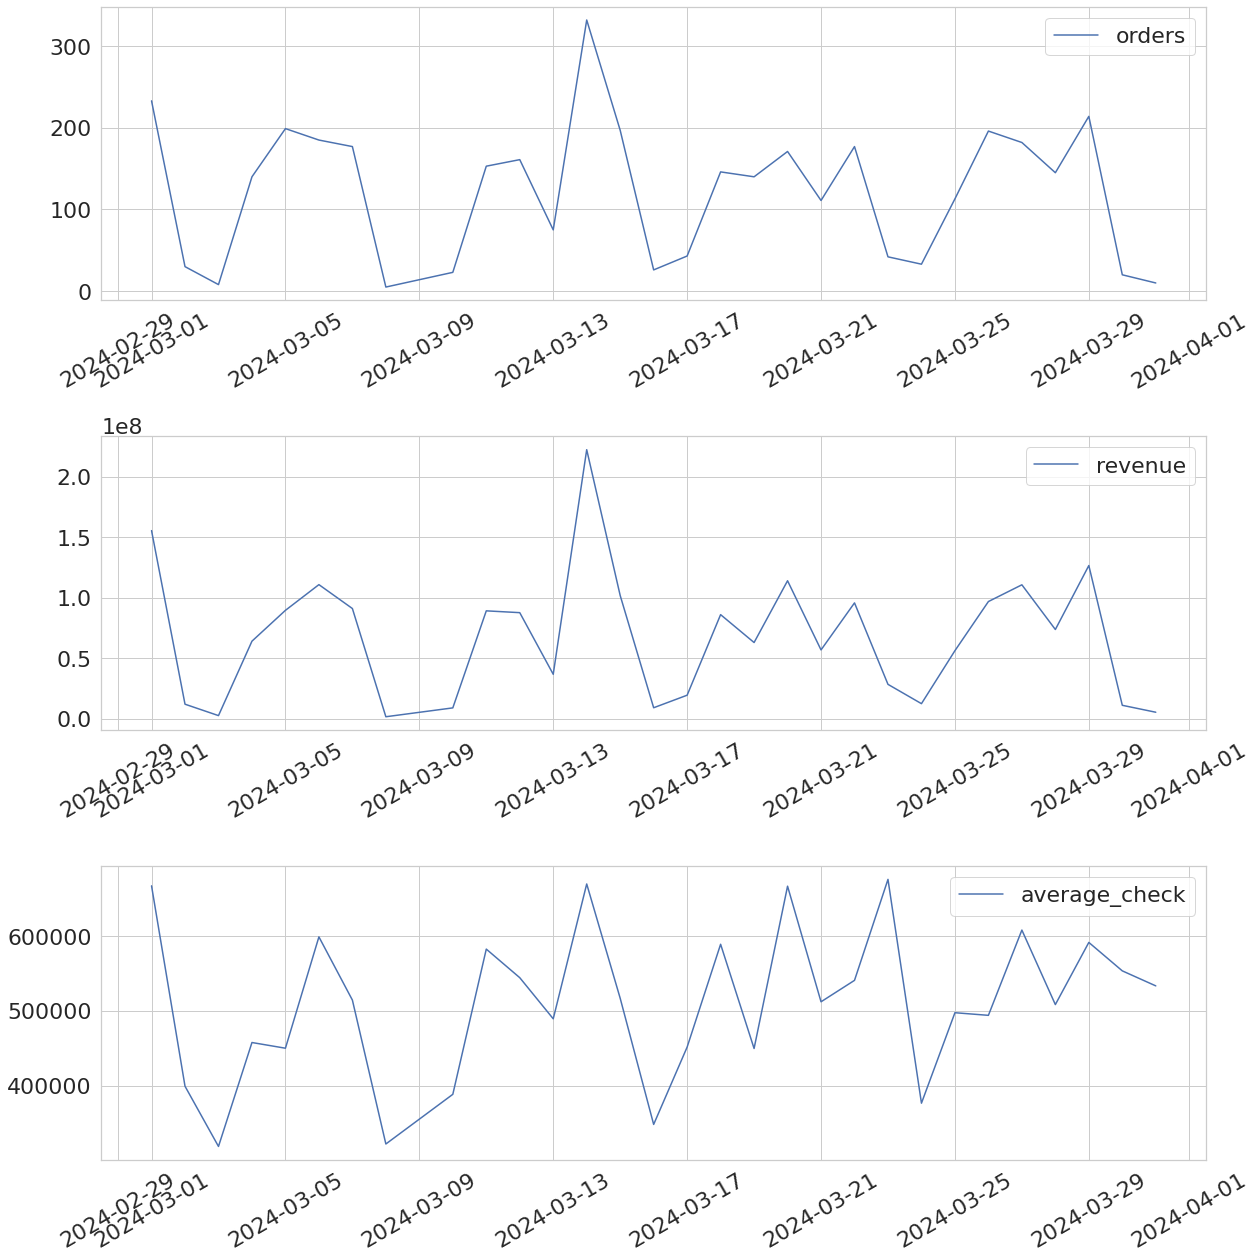

In [55]:
#3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)

metrics = ['orders', 'revenue', 'average_check']

fig, axes = plt.subplots(3, 1, figsize=(18, 18))

for i, metric in enumerate(metrics):
    df = df_report_by_date[['date', metric]].set_index('date')
    sns.lineplot(data=df, ax=axes[i]);
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel('')

plt.tight_layout();

In [56]:
# 6 марта число заказов упало, а выручка выросла
# 26 марта средний чек упал, а выручка выросла
# в день с максимальным числом заказов, 14 марта, значение среднего чека не было максимальным. 
# Максимальным оно было 20 марта
# выручку и средний чек важно посчитать на каждый день, а не единое значение на месяц

#Ответ:
#- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)
#- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)
#- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение
#- с течением времени выручка то увеличивается, то уменьшается
#- на протяжении всего месяца средний чек то увеличивается, то уменьшается

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [64]:
df_full['brand'] = df_full['name'].str.split(',').str.get(0)

In [68]:
df_full['brand'].nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [76]:
df_full.query("status == 'confirmed'")\
       .groupby('brand',as_index=False)\
       .agg({'revenue': 'sum', 'order_id': 'nunique'})\
       .rename(columns={'order_id': 'orders'})\
       .sort_values(by='revenue', ascending=False)\
       .sort_values(by='orders', ascending=False)

,brand,revenue,orders
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
120,Yamaha,1.658651e+08,218
53,Klipsch,2.039024e+08,205
62,Magnat,1.141989e+08,154
...,...,...,...
8,AudioSource,3.388167e+04,1
40,Fosi Audio,3.129419e+04,1
107,Technics,2.648291e+05,1
18,Bravo Audio,2.405086e+04,1


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [89]:
products_in_orders = df_confirmed['product_id'].unique()

In [99]:
df_products['is_in_orders'] = df_products['id'].isin(products_in_orders).map({True: 'yes', False: 'no'})

In [100]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [104]:
df_products['brand'] = df_products['name'].str.split(',').apply(lambda x: x[0])
df_products.head()

,id,name,price,category,is_in_orders,brand
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes,Denon
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes,Denon
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes,Denon
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes,Denon
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon


In [149]:
df_products_new = df_products\
                  .groupby(['brand', 'is_in_orders'],as_index=False)\
                  .agg({'id' : 'nunique'})\
                  .rename(columns={'id': 'products'})\
                  .pivot_table(index='brand', columns='is_in_orders', values='products')\
                  .rename_axis(None, axis=1)\
                  .fillna(0)\
                  .reset_index()

In [150]:
df_products_new['total_products'] = total_products['yes'] + total_products['no']

In [151]:
df_products_new['not_ordered_ratio'] = df_products_new['no'] / df_products_new['total_products']

In [152]:
df_products_new.query("total_products > 15 and not_ordered_ratio > 0.5")

,brand,no,yes,total_products,not_ordered_ratio
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

In [177]:
df_confirmed_report = df_confirmed.groupby('manager',as_index=False)\
                                  .agg({'revenue' : 'sum', 'order_id' : 'nunique'})\
                                  .rename(columns={'order_id': 'orders'})\
                                  .sort_values(by='revenue', ascending=False)

In [179]:
df_confirmed_report['revenue_percentage'] = ((df_confirmed_report['revenue'] / df_confirmed_report['revenue'].sum()) * 100).round(2)

In [180]:
df_confirmed_report['orders_percentage'] = ((df_confirmed_report['orders'] / df_confirmed_report['orders'].sum()) * 100).round(2)

In [185]:
df_confirmed_report

,manager,revenue,orders,revenue_percentage,orders_percentage
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27


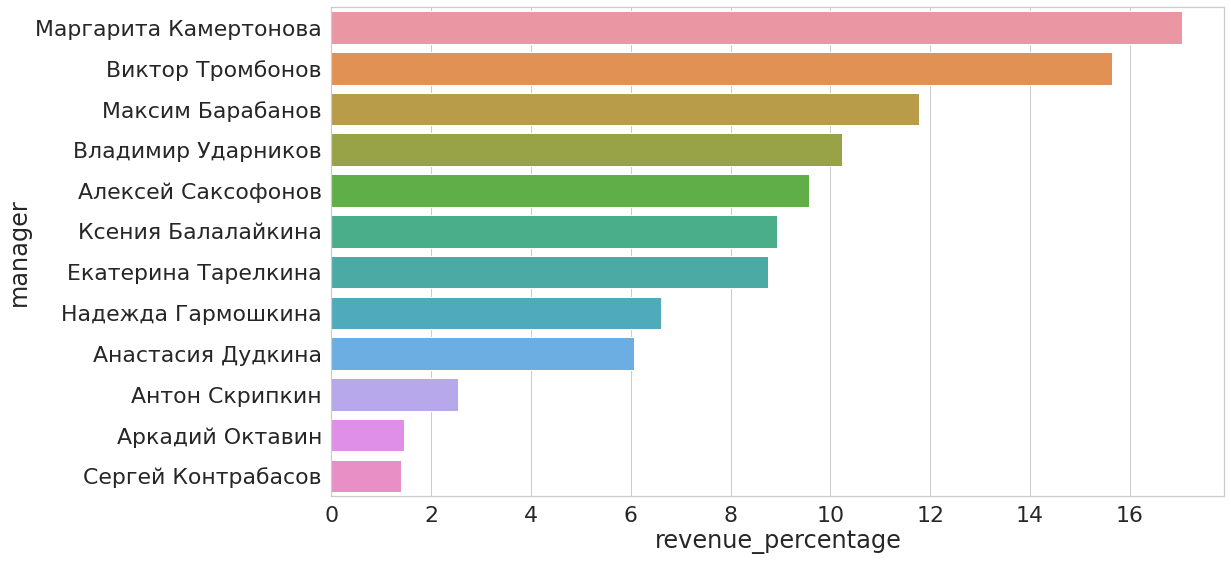

In [182]:
sns.barplot(x = 'revenue_percentage', y = 'manager', data = df_confirmed_report)

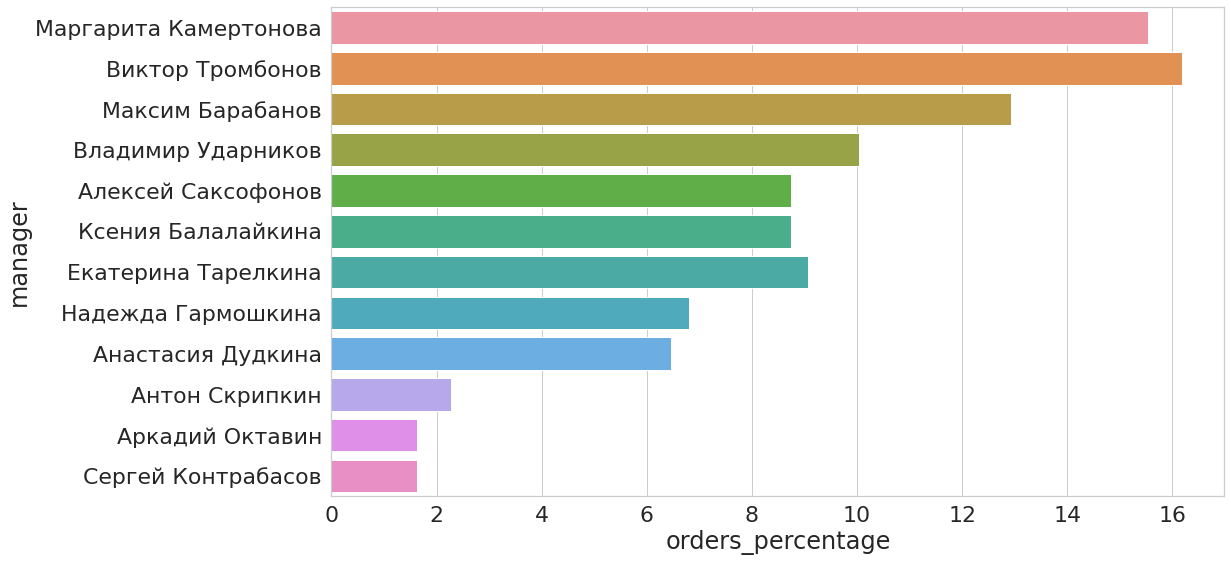

In [184]:
sns.barplot(x = 'orders_percentage', y = 'manager', data = df_confirmed_report)

In [ ]:
# Ответ:
# лучшим менеджером по % выручки стала Маргарита Камертонова
# в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных
# лидер по % заказов реализовал более 16% заказов
# наихудшие показатели у Сергея Контрабасова
# Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке».